## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.

## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

In [1]:
import pandas as pd

In [120]:
df = pd.read_csv('measures_v2.csv')
df.head(5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [3]:
len(df)

1330816

**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков.**

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [5]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

<AxesSubplot:>

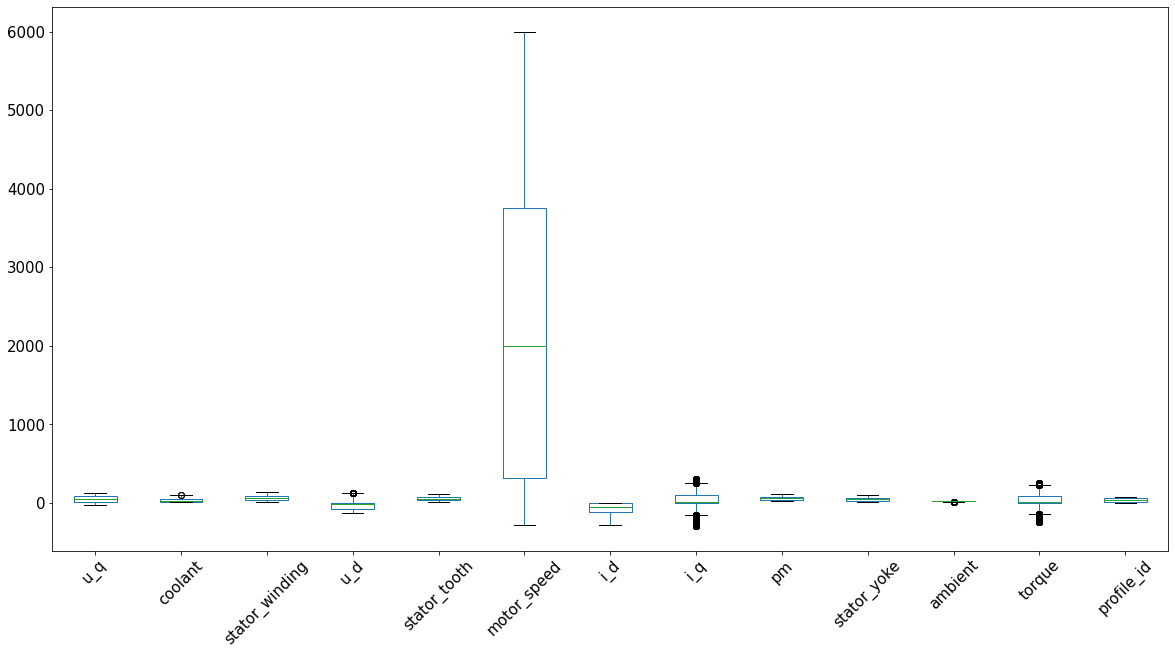

In [6]:
df.boxplot(grid=False, figsize=(20,10), rot=45, fontsize=15)

<AxesSubplot:>

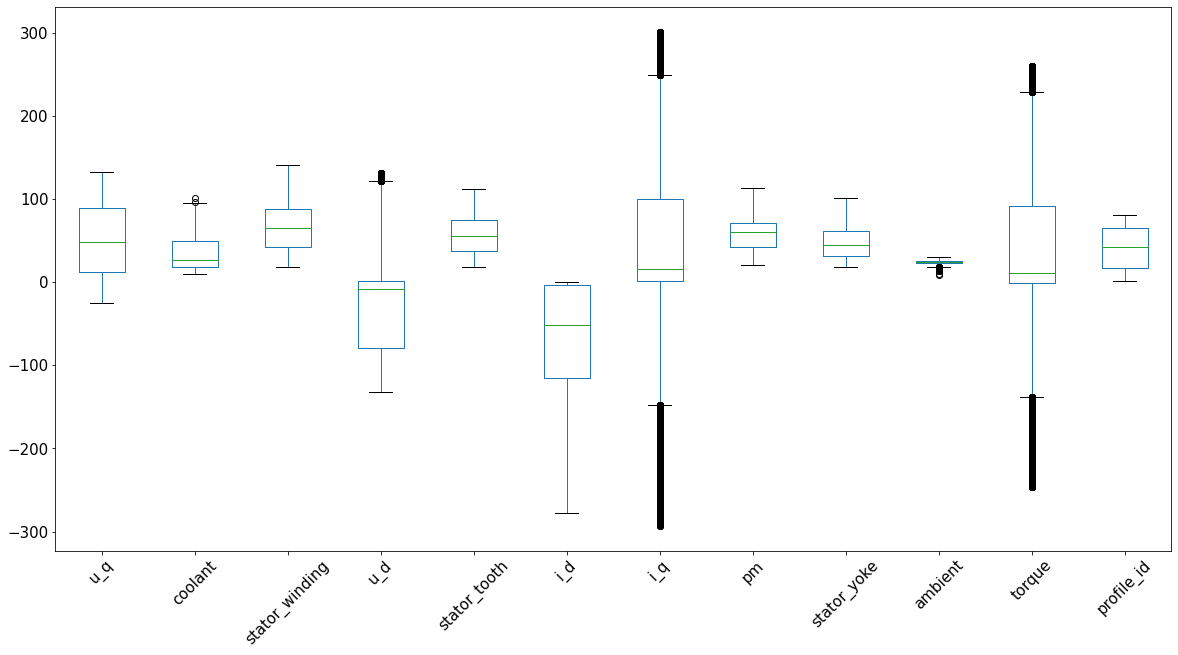

In [7]:
df.drop('motor_speed', axis=1).boxplot(grid=False, figsize=(20,10), rot=45, fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coolant'>

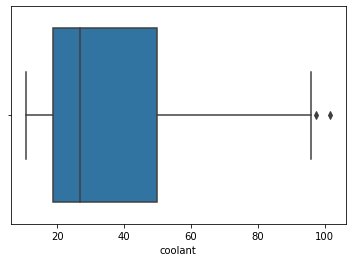

In [8]:
sns.boxplot(df['coolant'])

In [121]:
df = df[df['coolant']<94]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coolant'>

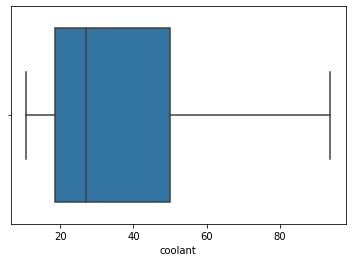

In [10]:
sns.boxplot(df['coolant'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='u_d'>

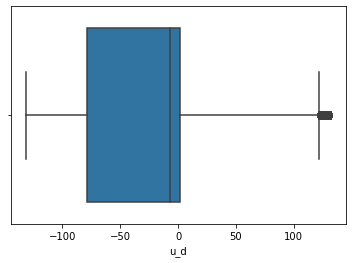

In [11]:
sns.boxplot(df['u_d'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ambient'>

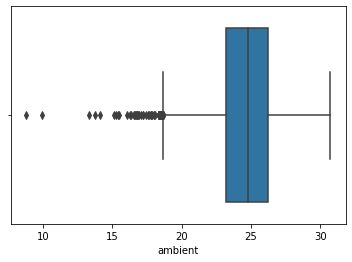

In [12]:
sns.boxplot(df['ambient'])

In [122]:
df = df[df['ambient']>18.1]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ambient'>

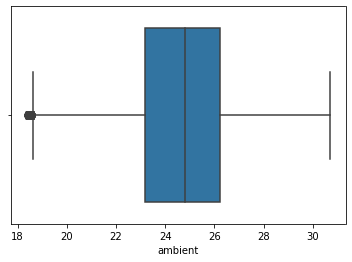

In [14]:
sns.boxplot(df['ambient'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='u_d'>

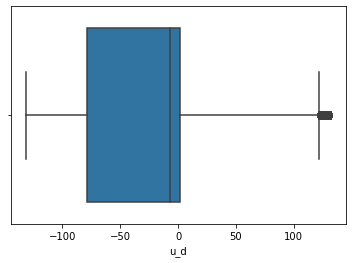

In [15]:
sns.boxplot(df['u_d'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='torque'>

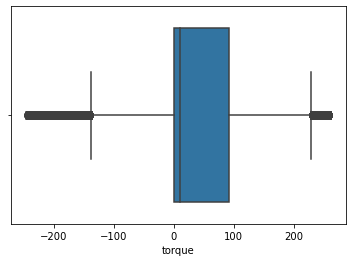

In [16]:
sns.boxplot(df['torque'])

<AxesSubplot:>

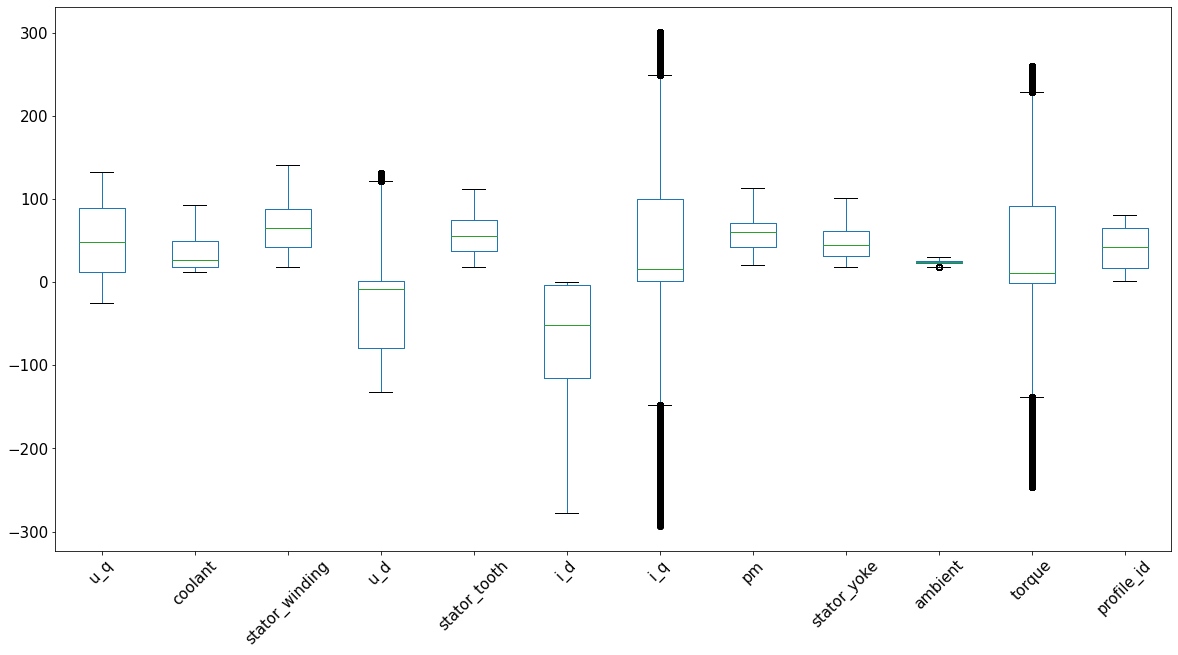

In [17]:
df.drop('motor_speed', axis=1).boxplot(grid=False, figsize=(20,10), rot=45, fontsize=15)

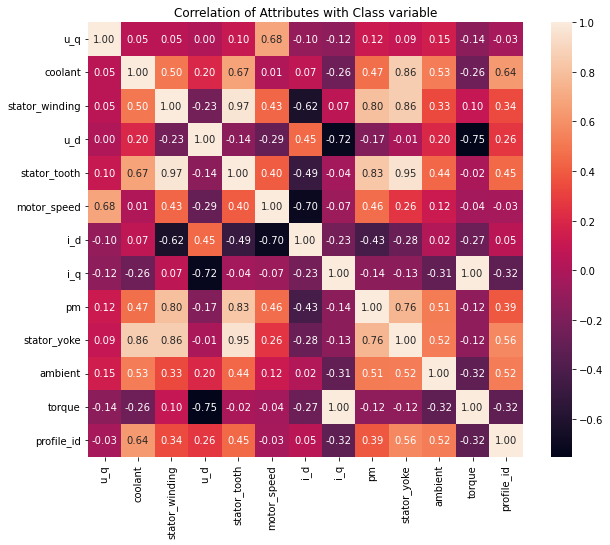

In [18]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

In [123]:
df = df.drop(['stator_tooth','torque'], axis=1)

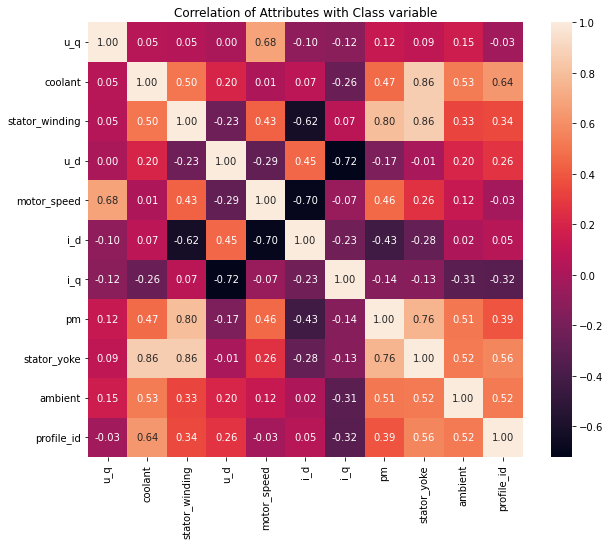

In [20]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
X = df.drop('motor_speed', axis=1)
y = df['motor_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [105]:
model = LinearRegression()

In [25]:
from sklearn.model_selection import cross_validate

In [106]:
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error'],cv=5)

In [107]:
scores = pd.DataFrame(scores)

In [108]:
scores['test_neg_mean_squared_error'] = abs(scores['test_neg_mean_squared_error'])
scores['test_neg_mean_absolute_error'] = abs(scores['test_neg_mean_absolute_error'])
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.469993,0.022000,359.171316,247594.583790
1,0.400998,0.021001,357.569195,244751.063334
2,0.442001,0.023001,358.629118,245891.028213
3,0.531015,0.018989,359.258416,246288.953617
4,0.409998,0.018000,358.062391,244230.145861


Text(0.5, 1.0, 'MAE')

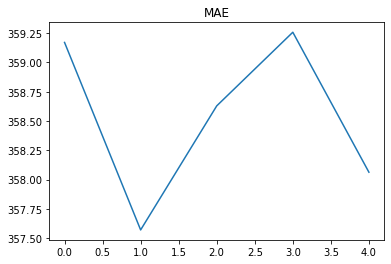

In [109]:
plt.plot(scores['test_neg_mean_absolute_error'])
plt.title('MAE')

Text(0.5, 1.0, 'MSE')

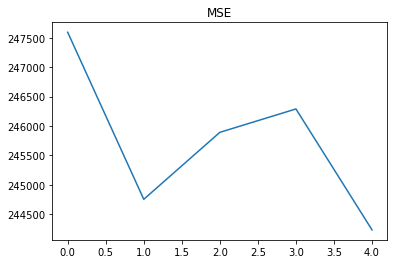

In [110]:
plt.plot(scores['test_neg_mean_squared_error'])
plt.title('MSE')

Text(0.5, 1.0, 'RMSE')

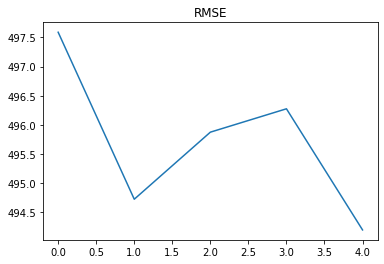

In [111]:
scores['RMSE'] = np.sqrt(scores['test_neg_mean_squared_error'])
plt.plot(scores['RMSE'])
plt.title('RMSE')

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
error_rate=[]
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    scores = cross_validate(knn,X_train,y_train,
                            scoring=['neg_mean_absolute_error',
                                     'neg_mean_squared_error'],cv=5)
    scores = pd.DataFrame(scores)
    scores['test_neg_mean_absolute_error'] = abs(scores['test_neg_mean_absolute_error'])
    print(scores['test_neg_mean_absolute_error'].mean())
    error_rate.append(scores['test_neg_mean_absolute_error'].mean())

14.36651746229335
12.163360784865597
12.59292159206473
12.941598775350048
13.320145635983698
13.644142277372955
13.939451761551874
14.21895881012089
14.46517215016103
14.69076441161052
14.894949336126519
15.095741441732931
15.278449696566549
15.442941227833458
15.594272449257693
15.74515968669068
15.882252655175137
16.01898925689964
16.137508461068784


Text(0, 0.5, 'Частота ошибок')

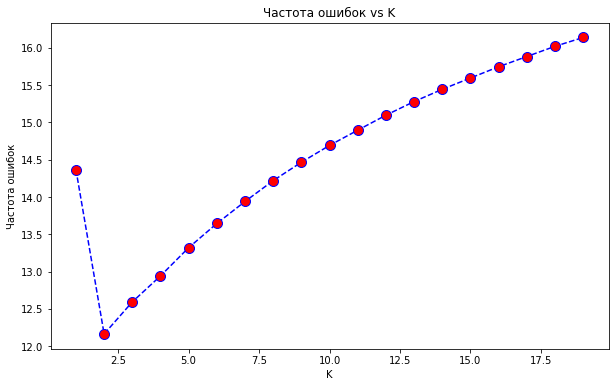

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Частота ошибок vs K')
plt.xlabel('K')
plt.ylabel('Частота ошибок')

In [74]:
model = KNeighborsRegressor(n_neighbors=3)
scores = cross_validate(model,X_train,y_train,
                        scoring=['neg_mean_absolute_error',
                                 'neg_mean_squared_error'],cv=5)

In [75]:
scores = pd.DataFrame(scores)

In [76]:
scores['test_neg_mean_squared_error'] = abs(scores['test_neg_mean_squared_error'])
scores['test_neg_mean_absolute_error'] = abs(scores['test_neg_mean_absolute_error'])
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,7.142725,16.418396,12.496846,1226.726444
1,6.874967,16.743323,12.545243,1276.446814
2,6.939217,16.518817,12.614119,1463.938708
3,6.906090,16.692964,12.600085,1277.323139
4,6.990016,17.444037,12.708314,1377.980690


In [94]:
(12.496846+12.545243+12.614119+12.600085+12.708314)/5

12.5929214

Text(0.5, 1.0, 'MAE')

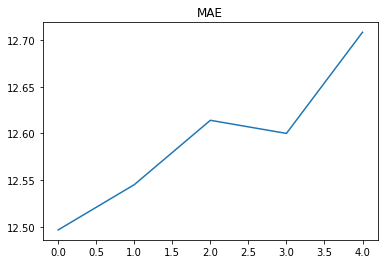

In [77]:
plt.plot(scores['test_neg_mean_absolute_error'])
plt.title('MAE')

Text(0.5, 1.0, 'MSE')

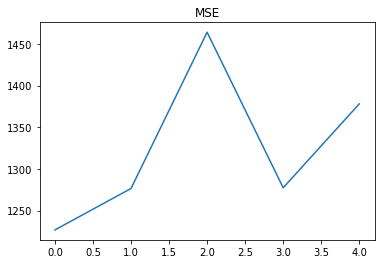

In [78]:
plt.plot(scores['test_neg_mean_squared_error'])
plt.title('MSE')

Text(0.5, 1.0, 'RMSE')

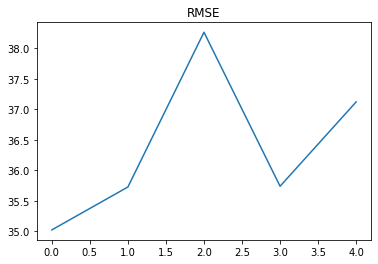

In [79]:
scores['RMSE'] = np.sqrt(scores['test_neg_mean_squared_error'])
plt.plot(scores['RMSE'])
plt.title('RMSE')

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [124]:
df['norm_i'] = np.sqrt(df['i_d']**2 + df['i_q']**2)
df['norm_u'] = np.sqrt(df['u_d']**2 + df['u_q']**2)
df['full_power'] = df['i_d']*df['i_q'] + df['u_d']*df['u_q']
df['effective_power_d'] = df['i_d'] + df['u_d']
df['effective_power_q'] = df['i_q'] + df['u_q']

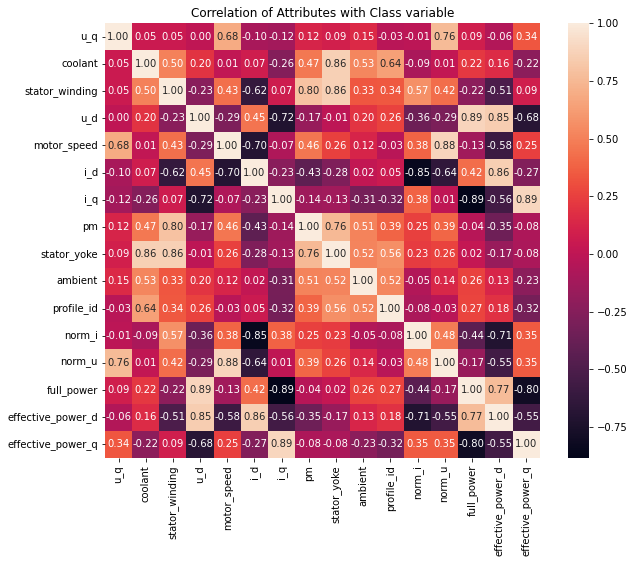

In [125]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**

In [126]:
X = df.drop('motor_speed', axis=1)
y = df['motor_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [127]:
model = LinearRegression()
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error'],cv=5)
scores = pd.DataFrame(scores)
scores['test_neg_mean_squared_error'] = abs(scores['test_neg_mean_squared_error'])
scores['test_neg_mean_absolute_error'] = abs(scores['test_neg_mean_absolute_error'])
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.726938,0.032426,225.276474,105736.325806
1,0.848944,0.034214,224.058595,104268.843043
2,0.685527,0.052904,224.306712,104638.223450
3,0.854028,0.029182,224.877340,105102.577697
4,0.787899,0.033004,224.357847,104158.622697


Text(0.5, 1.0, 'MAE')

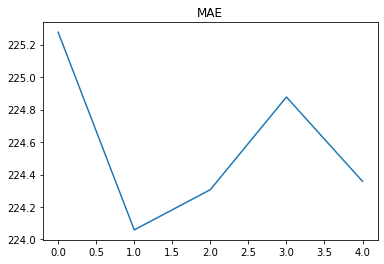

In [128]:
plt.plot(scores['test_neg_mean_absolute_error'])
plt.title('MAE')

Text(0.5, 1.0, 'MSE')

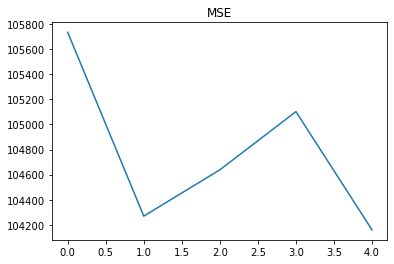

In [129]:
plt.plot(scores['test_neg_mean_squared_error'])
plt.title('MSE')

Text(0.5, 1.0, 'RMSE')

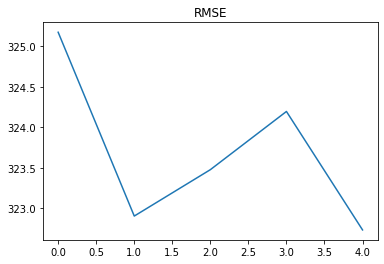

In [130]:
scores['RMSE'] = np.sqrt(scores['test_neg_mean_squared_error'])
plt.plot(scores['RMSE'])
plt.title('RMSE')

In [131]:
model = KNeighborsRegressor(n_neighbors=3)
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error'],cv=5)
scores = pd.DataFrame(scores)
scores['test_neg_mean_squared_error'] = abs(scores['test_neg_mean_squared_error'])
scores['test_neg_mean_absolute_error'] = abs(scores['test_neg_mean_absolute_error'])
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,14.464663,17.616687,28.441852,5196.827554
1,12.687690,17.444524,28.665435,5256.036865
2,12.149294,11.017574,28.488503,5460.934120
3,8.730382,10.693764,28.754252,5620.681585
4,8.600520,10.506960,28.732660,5396.237024


Text(0.5, 1.0, 'MAE')

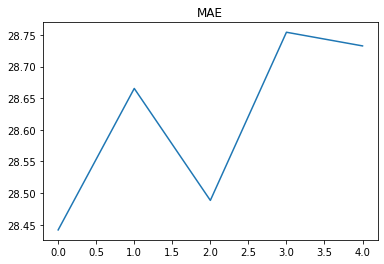

In [132]:
plt.plot(scores['test_neg_mean_absolute_error'])
plt.title('MAE')

Text(0.5, 1.0, 'MSE')

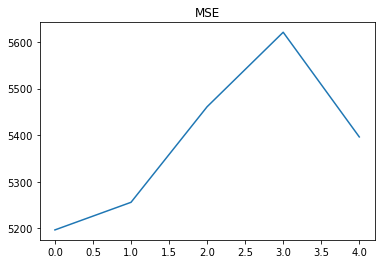

In [133]:
plt.plot(scores['test_neg_mean_squared_error'])
plt.title('MSE')

Text(0.5, 1.0, 'RMSE')

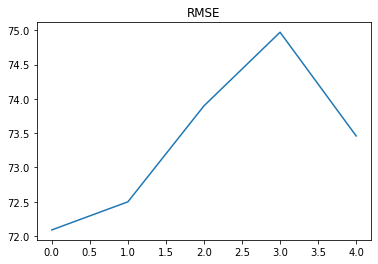

In [134]:
scores['RMSE'] = np.sqrt(scores['test_neg_mean_squared_error'])
plt.plot(scores['RMSE'])
plt.title('RMSE')

# Вывод

Исходных данных нет NaN значений. В некоторых столбцах существуют выброс, были удаленны, также есть столбцы, которые дублируют друг друга.
Были удалены таблицы которые были схож по изменениям с другими (корелировали друг с другом)(['stator_tooth','torque']). Чтобы ускорить обучение. 
Видно, что данные линейно не зависимые, так как идет большой разбег по MAE.
В KNN наиболее подходящее число соседей является 3. Величина MAE = 12,6 которое меньше в 28 раз меньше показателей линейной регрессии.
При генерации новых данных точность линейной регрессии увеличилась и MAE уменьшилась с 359 до 245, MSE уменьшилась с 246 500 до 105 200.
А KNN уменьшилась и стал хуже, а MAE увеличилась в 2 раза, MSE увеличилась в 4 раз.

Для этого датасета подходит обучение методом KNN, на исходных данных, где MAE = 12,6, MSE = 1350.